# Simple Linear Regression: How does it Work

Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.

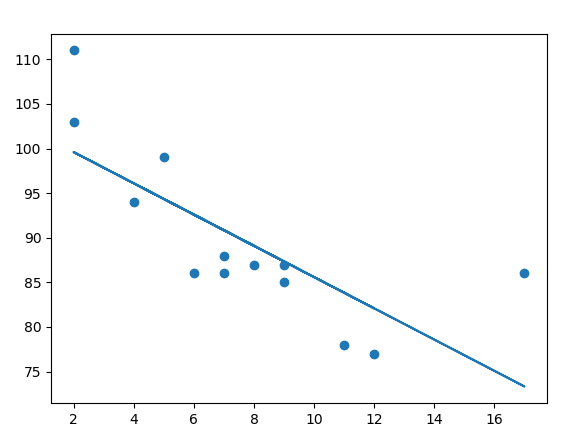

Python has methods for finding a relationship between data-points and to draw a line of linear regression. We will show you how to use these methods instead of going through the mathematic formula.

In the example below, the x-axis represents age, and the y-axis represents speed. We have registered the age and speed of 13 cars as they were passing a tollbooth. Let us see if the data we collected could be used in a linear regression:

In this example We'll see how model works at the backend/internally when we define the function

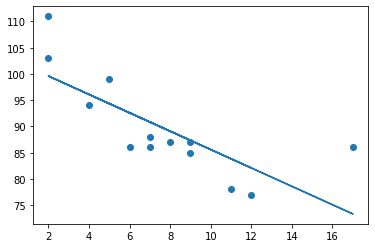

In [1]:
#Import the required modules
import matplotlib.pyplot as plt
from scipy import stats
#Create the arrays that represents the values of the x and y axis:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

#Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

#Working of a model

#Create a function that uses the slope and intercept values to return a new value. 
#This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

#Run each value of the x array through the function. 
#This will result in a new array with new values for the y-axis:
mymodel = list(map(myfunc, x))

#Draw the original scatter plot:
plt.scatter(x, y)
#Draw the line of linear regression:
plt.plot(x, mymodel)
#Display the diagram:
plt.show()

R-Squared: 
It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from -1 to 1, where 0 means no relationship, and 1, or -1, means 100% related.

Python and the Scipy module will compute this value for you, all you have to do is feed it with the x and y values:

In [2]:
from scipy import stats
#How well does my data fit in a linear regression?
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r, p, std_err)

-0.758591524376155 0.0026468739224561064 0.453536157607742


The result -076 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

In [3]:
#Predict the speed of a 10 years old car:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


The example predicted a speed at 85.6, which we also could read from the diagram:

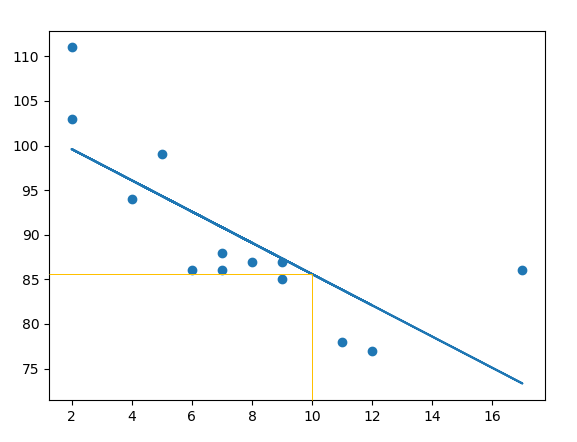

Well, so we just saw how we can manually create the model by defining the function and calling the method for prediction and calculation. This is exactly how Python's ML libraries and modules work at the backend when imported and called for execution. Now lets implement the Simple Linear Regression on the Real Data and monitor its performance

# Dataset Definition

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.

So our task is to predict the maximum temperature taking input feature as the minimum temperature.

# Import Libraries and Load Dataset

[Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) (sklearn) is one of the most popular machine learning libraries for Python.
*   Simple and efficient tools for predictive data analysis
*   Accessible to everybody, and reusable in various contexts
*   Built on NumPy, SciPy, and matplotlib
*   Open source, commercially usable





In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:

from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
dataset=pd.read_csv(io.BytesIO(uploaded['WeatherWW2.csv']))

Saving WeatherWW2.csv to WeatherWW2 (3).csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Dataset Exploration

In [13]:
print(dataset.shape)
dataset.describe()

(119040, 31)


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


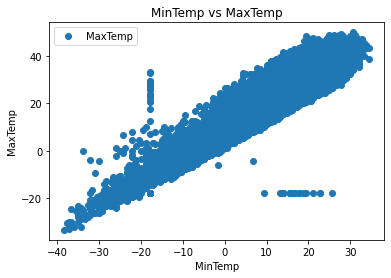

In [14]:
#Plot the dataset 2D graph
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

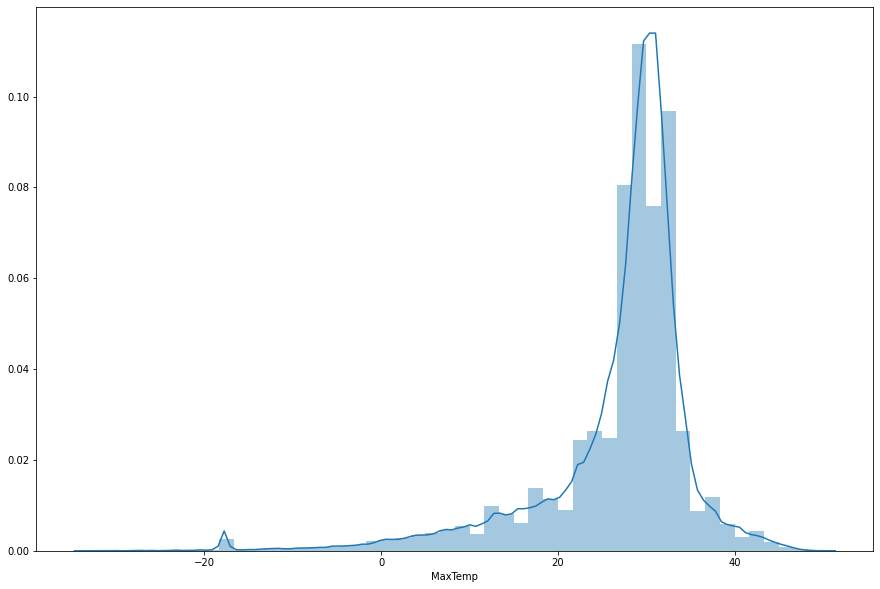

In [10]:
#Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [15]:
#A numpy matrix can be reshaped into a vector using reshape function with parameter -1.
#This is useful when converting a large array shape, if your data has single feature
#trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
print(X)
print(y)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]
[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]


# Training and Test Datasets

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#Random state controls the random number generator used. 
#Using an int will produce the same results across different calls. However, it may be worthwhile checking that your results are stable across a number of different distinct random seeds. 
#Popular integer random seeds are 0 and 42

(95232, 1)
(23808, 1)
(95232, 1)
(23808, 1)


# Train the Algorithm

We need to import LinearRegression class, instantiate it, and call the fit() method along with our training data

In [18]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

#The result should be approximately 10.66185201 and 0.92033997 respectively.

[10.66185201]
[[0.92033997]]


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

# Prediction on Test Data

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score

In [25]:
y_pred = regressor.predict(X_test)
print(y_pred)
y_newmax = regressor.predict([[20]])
print("New Maximum temp is ",y_newmax)

[[33.67035117]
 [30.0912513 ]
 [26.51215143]
 ...
 [32.64775121]
 [30.60255128]
 [31.62515124]]
New Maximum temp is  [[29.06865134]]


Now compare the actual output values for X_test with the predicted values, execute the following script:

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


Visualize the Comparison

We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

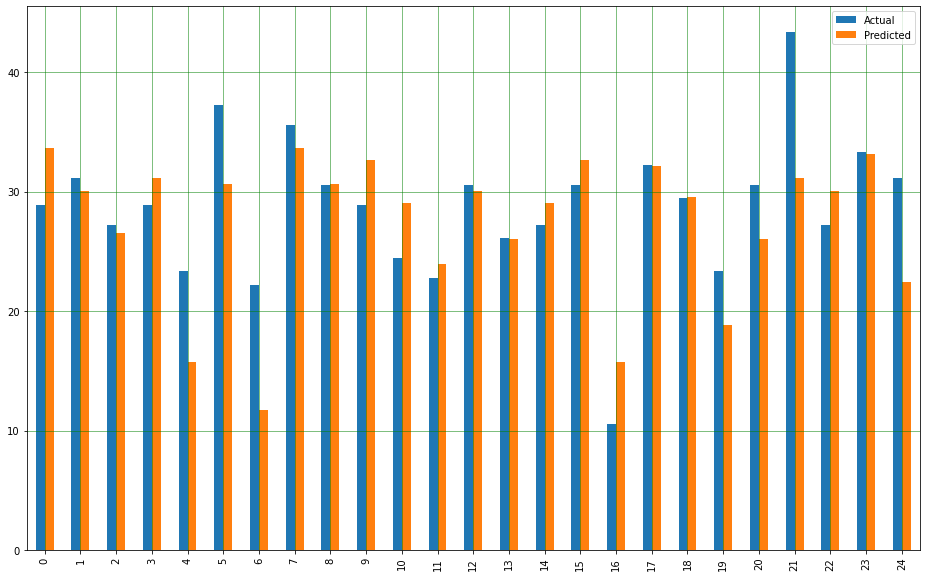

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

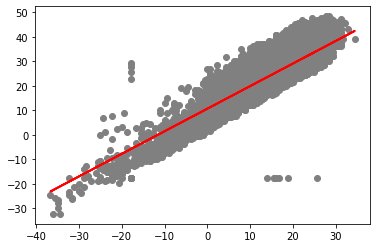

In [20]:
#Now lets plot straight line with Test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct

# Evaluate the model: Performance of Algorithm

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
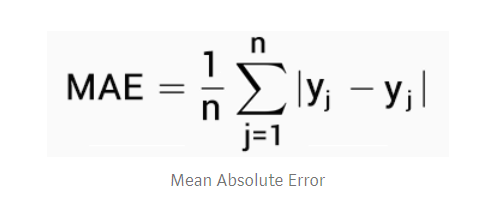

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

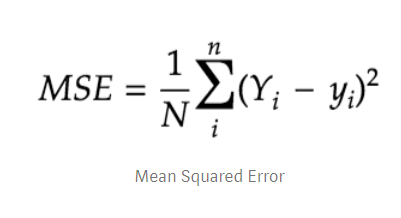

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

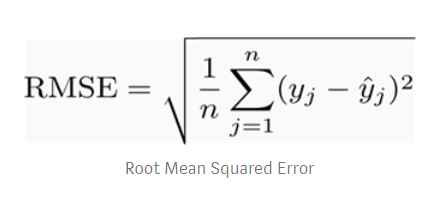


Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test data

In [22]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared Value (r2):', r2_score(y_test,y_pred))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204
R-Squared Value (r2): 0.7670218843587764


You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [10]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm
reg_ols = sm.OLS(y,X)
stat_results = reg_ols.fit()
#print(stat_results)
stat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          2.412e+06
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        02:12:24   Log-Likelihood:                     -3.8537e+05
No. Observations:              119040   AIC:                                  7.708e+05
Df Residuals:                  119039   BIC:                                  7.708e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4120      0.001   1553.151      0.000       1.410       1.414
==============================================================================
Omnibus:                    16133.302   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36650.854
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.189   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# References

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

http://www.fairlynerdy.com/what-is-r-squared/#:~:text=For%20the%20regression%20line%20for,R2%20value%20is%20positive.&text=The%20result%20is%20that%20the,squared%20value%20is%20the%20result.

https://www.w3schools.com/python/python_ml_linear_regression.asp